In [12]:
import numpy as np
import sys
from __future__ import annotations
import os
import matplotlib.pyplot as plt
import pandas as pd

sys.path.append(os.path.dirname(os.getcwd()))

from lib.sampler import generate_grid, generate_reference_data
from lib.sympy_helper import get_function_from_output
from lib.metrics import plot_errors

In [13]:
ref_func = get_function_from_output("msre-ref-4", max_complexity=68)
corr_func = get_function_from_output("max-corr-5", max_complexity=100)

In [14]:
df = generate_reference_data(10_000)
df['ref'] = df.apply(lambda row: ref_func(row['diameter']), axis=1)
# df['corr'] = df.apply(lambda row: corr_func(row['diameter'], row['temperature'], row['density'], row['dynamic_viscosity']), axis=1)
df['corr'] = df.apply(lambda row: corr_func(row['diameter'], row['temperature'], row['density']), axis=1)

df['pred'] = df['ref'] * df['corr']

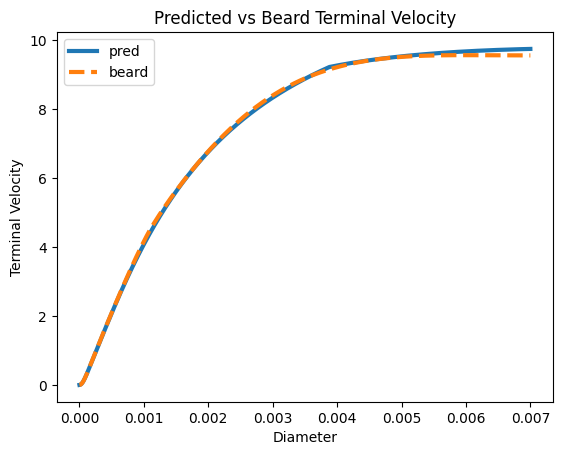

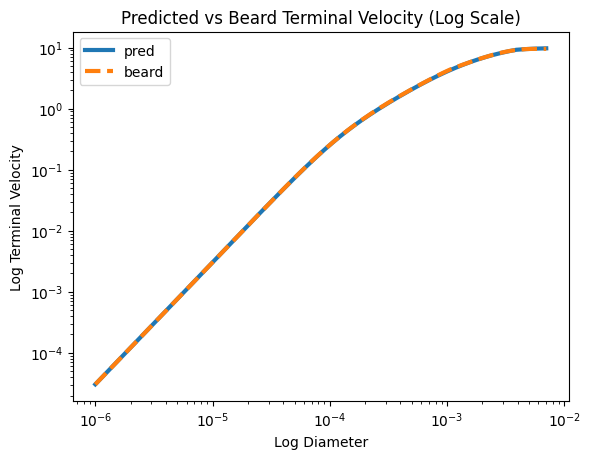

In [15]:
width = 3
plt.plot(df['diameter'], df['pred'], label="pred", lw=width)
plt.plot(df['diameter'], df['v_t'], label="beard", linestyle='dashed', lw=width)
plt.xlabel("Diameter")
plt.ylabel("Terminal Velocity")
plt.legend()
plt.title("Predicted vs Beard Terminal Velocity")
plt.savefig("../images/pred_ref.pdf")
plt.show()

plt.plot(df['diameter'], df['pred'], label="pred", lw=width)
plt.plot(df['diameter'], df['v_t'], label="beard", linestyle='dashed', lw=width)
plt.xscale('log')
plt.yscale('log')
plt.xlabel("Log Diameter")
plt.ylabel("Log Terminal Velocity")
plt.title("Predicted vs Beard Terminal Velocity (Log Scale)")
plt.savefig("../images/pred_ref_log.pdf")
plt.legend()

In [16]:
# print errors
df['abs'] = np.abs(df['v_t'] - df['pred'])
df['rel'] = df['pred'] / df['v_t']
df[['rel', 'abs']].describe()

,rel,abs
count,10000.000000,1.000000e+04
mean,0.996974,1.544213e-02
std,0.006126,2.897215e-02
min,0.978112,3.401596e-09
25%,0.993293,3.625338e-06
50%,0.998643,1.001058e-03
75%,1.001164,1.503614e-02
max,1.019663,1.881160e-01


In [17]:
from lib.sampler import generate_grid
grid_df = generate_grid(size=50)

In [18]:
grid_df['vel_ref'] = grid_df.apply(lambda row: ref_func(row['diameter']), axis=1)

In [19]:
# df['correction'] = df.apply(lambda row: corr_func(row['diameter'], row['temperature'], row['density'], row['dynamic_viscosity']), axis=1)
grid_df['correction'] = grid_df.apply(lambda row: corr_func(row['diameter'], row['temperature'], row['density']), axis=1)

grid_df['pred_v_t'] = grid_df['vel_ref'] * grid_df['correction']

grid_df['absolute_error'] = np.abs(grid_df['pred_v_t'] - grid_df['v_t'])
grid_df['relative_error'] = (grid_df['absolute_error'] / grid_df['v_t']) * 100

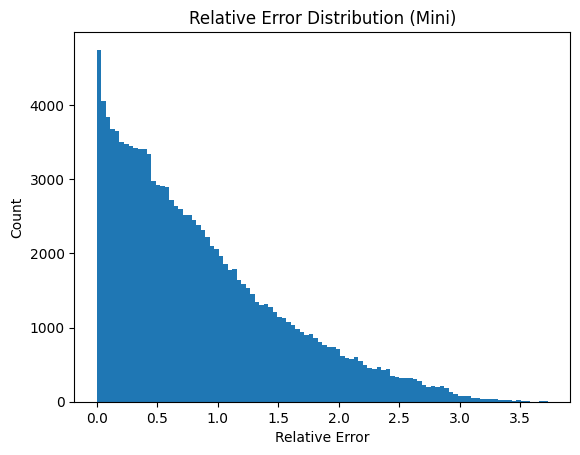

In [20]:
import matplotlib.pyplot as plt

plt.hist(grid_df['relative_error'], bins=100)
plt.xlabel('Relative Error')
plt.ylabel('Count')
plt.title('Relative Error Distribution (Mini)')
plt.savefig('../images/relative_error_distribution.pdf', bbox_inches='tight', dpi=300)
plt.show()

In [ ]:
# # Check for monotonicity for all temperature and pressure combinations
# temperatures = np.unique(grid_df['temperature'])
# pressures = np.unique(grid_df['pressure'])

# grid = np.array(np.meshgrid(temperatures, pressures)).T.reshape(-1, 2)

# for i, (temperature, pressure) in enumerate(grid):    
#     # ensure that we are monotonically increasing in diameter over this range
#     df_subset = grid_df[(grid_df['temperature'] == temperature) & (grid_df['pressure'] == pressure)]
#     df_subset = df_subset.sort_values(by='diameter')
#     decreasing = df_subset[df_subset['pred_v_t'].diff() < 0]
#     # if the diameter is less than 0.006 we have an issue
#     if np.any(decreasing['diameter'] < 0.006):
#         print(temperature, pressure)
#         print(decreasing)